# Exploratory Data Analysis Amazon Electronics Keywords

* Today we are going to make an exploratory data analysis for keywords in the electronics category of Amazon.

* Keyword analysis is essential for sellers on Amazon. This analysis should be made for both private label and re-sellers.

* Private Label Sellers use keywords to index their product in high demand and low competition areas. They may require long-tail keywords to better answer customer needs.

* Resellers use keywords to find high demand products to source and make profit.

* In this analysis, we will make a research on market and examine the most searched keywords.

* **Note:** Amazon does not share its data with 3rd parties. The dataset used in this analysis is sourced from Blackbox tool of Hellium10. Hellium10 one of the most popular and trustable software that used by many of Amazon sellers. H10 supplies estimated data thus, this dataset does not reflect real-world results.

## Import Libraries and Dataset

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
# Read the file.
raw_df = pd.read_csv("/content/merged_keywords.csv")

## Check the dataset

In [42]:
raw_df.head().append(raw_df.tail())

<ipython-input-42-33f549c6cf36>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Phrase,Search Volume,Category,Fulfillment,Size Tier,Variation Count,BSR,Price,Monthly Sales,Monthly Revenue,...,Reviews Rating,Sellers,Last Year Sales,Sales Year Over Year,Sales Trend (90 days),Price Trend (90 days),Best Sales Period,Broad Reach Potential,Number of competing products,Sales to Reviews
0,cheap headphones,2839,Electronics,FBA,Large Standard-Size,18,5589,14.00,3090,33990.58,...,4.21,4,28517.0,339.0,132,0,"Aug, 2023",7,10000,1.31
1,lg replacement remote,2839,Electronics,FBA,Large Standard-Size,2,6894,17.47,3296,51247.66,...,4.47,3,41807.0,14.0,106,-2,"Jan, 2024",5,3000,1.91
2,car backup camera,2839,Electronics,FBA,Large Standard-Size,2,5966,47.40,930,47650.43,...,4.35,2,13309.0,7.0,-26,0,"Mar, 2022",7,9000,0.66
3,pixel earbuds,2839,Electronics,FBA,Large Standard-Size,5,17544,41.58,4406,223333.29,...,4.24,4,32342.0,122.0,0,0,"Sep, 2023",6,787,2.12
4,motion sensor alarm,2839,Electronics,FBA,Large Standard-Size,3,11685,24.41,879,25031.44,...,4.24,2,11825.0,-21.0,93,0,"Mar, 2022",6,4000,1.06
4506,car trackers for your vehicle,3925,Electronics,FBA,Large Standard-Size,1,7235,36.33,1969,51987.84,...,4.11,2,31652.0,8.0,0,0,"Jun, 2022",3,433,4.79
4507,big speaker,3925,Electronics,FBA,Large Standard-Size,4,5958,138.47,922,125169.91,...,4.41,5,17751.0,11.0,-6,0,"Dec, 2023",7,100000,0.70
4508,smart watch for men,3925,Electronics,FBA,Large Standard-Size,6,5235,61.55,1391,75041.53,...,4.32,3,14098.0,-22.0,0,-5,"Jan, 2024",8,3000,2.34
4509,record player stand with vinyl storage,3925,Electronics,FBA,Small Oversize,4,21851,79.50,768,46427.49,...,4.48,2,4379.0,NaN,0,0,"Jan, 2024",3,579,5.77
4510,tv wall mount 40 inch,3925,Electronics,FBA,Large Standard-Size,1,2894,23.00,4985,133378.47,...,4.64,2,6960.0,NaN,-24,-1,"Jan, 2024",5,413,2.43


In [43]:
raw_df.shape

(4511, 21)

* Dataset contains 4511 rows and 21 columns. This may not be a big dataset but we try to extract the most.

You can see the whole column names in the following code. Dataset includes many parameters about the keywords. We will not focus all of the columns but the most important ones.

In [44]:
raw_df.columns

Index(['Phrase', 'Search Volume', 'Category', 'Fulfillment', 'Size Tier',
       'Variation Count', 'BSR', 'Price', 'Monthly Sales', 'Monthly Revenue',
       'Review Count', 'Reviews Rating', 'Sellers', 'Last Year Sales',
       'Sales Year Over Year', 'Sales Trend (90 days)',
       'Price Trend (90 days)', 'Best Sales Period', 'Broad Reach Potential',
       'Number of competing products', 'Sales to Reviews'],
      dtype='object')

In [45]:
# Check for data types and null values

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Phrase                        4511 non-null   object 
 1   Search Volume                 4511 non-null   int64  
 2   Category                      4511 non-null   object 
 3   Fulfillment                   4511 non-null   object 
 4   Size Tier                     4488 non-null   object 
 5   Variation Count               4511 non-null   int64  
 6   BSR                           4511 non-null   int64  
 7   Price                         4511 non-null   float64
 8   Monthly Sales                 4511 non-null   int64  
 9   Monthly Revenue               4511 non-null   object 
 10  Review Count                  4511 non-null   int64  
 11  Reviews Rating                4511 non-null   float64
 12  Sellers                       4511 non-null   int64  
 13  Las

We have both numeric and categorical columns. Some of the columns has null values. We can either impute the nulls or remove but, we will decide it in the future.

Now, lets check the overall metrics of numeric columns.

In [46]:
raw_df.describe()

,Search Volume,Variation Count,BSR,Price,Monthly Sales,Review Count,Reviews Rating,Sellers,Last Year Sales,Sales Year Over Year,Sales Trend (90 days),Price Trend (90 days),Broad Reach Potential,Number of competing products,Sales to Reviews
count,4.511000e+03,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4347.000000,3507.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000
mean,1.197592e+04,5.520062,31948.951230,197.645170,2804.117491,8689.863445,4.369315,5.388606,35682.818265,211.942116,66.132121,1.025715,5.512968,2197.284859,3.235260
std,4.387772e+04,7.961046,51576.640409,406.541951,3747.965882,14410.758195,0.303778,5.000660,51286.643793,1697.472015,1003.246658,10.924707,2.164980,7337.733166,6.543102
min,2.136000e+03,0.000000,5.000000,2.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,-99.000000,-135.000000,-79.000000,0.000000,1.000000,-1.000000
25%,2.838000e+03,2.000000,4984.500000,28.380000,509.000000,1261.500000,4.270000,2.000000,5828.000000,-19.000000,-3.000000,0.000000,4.000000,229.000000,0.960000
50%,3.925000e+03,4.000000,13989.000000,78.640000,1342.000000,3569.000000,4.400000,4.000000,15718.000000,8.000000,0.000000,0.000000,5.000000,640.000000,1.850000
75%,7.701000e+03,7.000000,36250.500000,189.600000,3458.000000,9175.500000,4.520000,7.000000,42719.000000,72.000000,23.000000,0.000000,7.000000,1000.000000,3.495000
max,1.542885e+06,227.000000,632973.000000,6904.900000,36162.000000,167142.000000,5.000000,42.000000,451747.000000,48993.000000,32767.000000,117.000000,10.000000,100000.000000,230.000000


## Exploratory Data Analysis

### Fulfillment Type

First of all we should analyze the fulfillment types. Because it is one of the most important metric that can effect a seller's decision.



In [80]:
fulfillment_types = raw_df["Fulfillment"].unique()
fulfillment_types

array(['FBA', 'FBM', 'Amazon'], dtype=object)

There are three different fulfillment type.
Amazon, FBA and FBM.

* Amazon, represents the seller and handler is Amazon itself.

* FBA means Fulfillment by Amazon. In this fulfillment type the seller is not Amazon, is a third party. But, stocking, handling, and shipping are done by Amazon. Seller sends his products to Amazon warehouses and then Amazon simply take care the rest.

* FBM means Fulfillment by Merchant. Seller is responsible from whole shopping experience. Stock, handle and ship processes are done by Seller himself.

**Our dataset shows the weighted fulfillment type in the search results.**

In [82]:
fulfillment_count = raw_df.Fulfillment.value_counts()
fulfillment_count

FBA       3231
Amazon     823
FBM        457
Name: Fulfillment, dtype: int64

* FBA is the most prefered fulfillment type by third-party seller. It has %70 dominance.
* Amazon exist nearly %20 of the search results.

In [104]:
# Plot the graph of Fulfillment Types

px.bar(data_frame=fulfillment_count, title="Count Fulfillment Types")

### Search Volume

Search volume is one of the most important metrics that shows the demand for a product of a market.

In [50]:
# Let's check the most searched keywords on Amazon's searchbar.

top_to_bottom = raw_df.sort_values(["Search Volume"], ascending=False)

top_to_bottom.head(25)

,Phrase,Search Volume,Category,Fulfillment,Size Tier,Variation Count,BSR,Price,Monthly Sales,Monthly Revenue,...,Reviews Rating,Sellers,Last Year Sales,Sales Year Over Year,Sales Trend (90 days),Price Trend (90 days),Best Sales Period,Broad Reach Potential,Number of competing products,Sales to Reviews
1975,airpods,1542885,Electronics,FBA,Large Standard-Size,6,557,73.05,15114,1267171.58,...,4.41,3,220385.0,NaN,0,-2,"Jan, 2024",10,2000,1.11
1976,apple watch,923385,Electronics,Amazon,Large Standard-Size,37,3300,239.21,3456,1036285.36,...,4.50,7,346.0,-85.0,-29,-12,"Nov, 2023",10,234,3.56
1977,ipad,856759,Electronics,Amazon,Large Standard-Size,36,33,474.50,23149,10569323.78,...,4.80,4,NaN,NaN,0,-4,"Jan, 2024",10,1000,2.15
1978,fire tv stick,769913,Electronics,Amazon,Large Standard-Size,5,308,24.66,19413,632224.78,...,4.63,25,236732.0,3.0,54,5,"Mar, 2023",7,291,0.67
1979,headphones,493492,Electronics,FBA,Large Standard-Size,7,526,24.11,11174,264323.93,...,4.49,5,123011.0,NaN,0,4,"Aug, 2023",10,10000,1.23
1980,digital camera,405329,Electronics,FBA,Large Standard-Size,6,15445,126.12,1866,160812.59,...,4.43,4,21542.0,15.0,0,-7,"Jan, 2024",9,2000,2.75
1981,ear buds,382793,Electronics,FBA,Large Standard-Size,9,245,33.12,13858,528066.92,...,4.49,4,187372.0,NaN,0,-1,"Mar, 2023",10,8000,2.96
1982,beats,380428,Electronics,Amazon,Large Standard-Size,10,1573,147.67,7830,1072476.33,...,4.43,4,111738.0,540.0,0,42,"Dec, 2022",10,1000,5.46
1983,monitor,379415,Electronics,Amazon,Small Oversize,6,1313,114.97,3873,376074.14,...,4.53,6,46587.0,25.0,267,2,"Jan, 2024",10,6000,1.32
1984,tablet,370970,Electronics,Amazon,Large Standard-Size,9,4384,121.52,1900,238575.87,...,4.25,5,24808.0,46.0,1,4,"Dec, 2023",10,3000,2.43


In [111]:
# Plot the graph.
px.bar(data_frame=top_to_bottom.head(25), x="Phrase", y="Search Volume", title="Most Searched Keywords", color="Fulfillment")


* Suprisingly! :) Apple products are the most popular keywords in the electronics category.
* Apple products especially Airpods are outliers.
* And, another unsuprising detail is that the most searched keywords are one word or short pharases. Direct description or name of a product.
* I hued the graph with Fulfillment type and it shows that most seached keywords are dominated by Amazon Logistic services.

In [52]:
# List in ascending order.

bottom_to_top = raw_df.sort_values(["Search Volume"])

bottom_to_top.head(25)

,Phrase,Search Volume,Category,Fulfillment,Size Tier,Variation Count,BSR,Price,Monthly Sales,Monthly Revenue,...,Reviews Rating,Sellers,Last Year Sales,Sales Year Over Year,Sales Trend (90 days),Price Trend (90 days),Best Sales Period,Broad Reach Potential,Number of competing products,Sales to Reviews
388,airpod replacement tips,2136,Electronics,FBA,Small Standard-Size,5,4677,11.77,3672,37446.83,...,4.30,2,47451.0,270.0,0,0,"Jan, 2024",5,554,4.15
397,gigabyte m27q-x,2136,Electronics,Amazon,Small Oversize,4,35704,274.31,457,126475.44,...,4.18,10,8614.0,-18.0,1,0,"Jan, 2024",1,85,4.35
396,monitor cheap,2136,Electronics,Amazon,Small Oversize,5,6571,68.38,2214,165938.43,...,4.37,3,20365.0,-18.0,267,0,"Jan, 2024",6,9000,2.03
395,beats replacement ear pads,2136,Electronics,FBA,Large Standard-Size,8,12770,11.69,1005,12384.06,...,4.56,2,12235.0,153.0,20,0,"Jan, 2023",6,1000,0.57
394,wire holder,2136,Electronics,FBA,Small Standard-Size,5,8019,15.53,3957,32032.39,...,4.50,2,41861.0,-7.0,178,0,"Jan, 2024",8,2000,7.50
393,bone conduction,2136,Electronics,FBA,Large Standard-Size,3,5020,46.86,2086,186305.69,...,4.25,2,50599.0,5.0,0,0,"Jan, 2024",7,1000,2.59
392,samsung tv 65+ inch,2136,Electronics,FBM,Large Oversize,23,60654,1093.62,488,267728.39,...,4.42,13,3107.0,-70.0,-64,-6,"Nov, 2023",7,260,0.52
391,galaxy tab s6,2136,Electronics,FBA,Large Standard-Size,6,68080,268.49,477,127168.97,...,4.63,7,5937.0,70.0,-57,-4,"Oct, 2023",6,177,0.49
390,displayport cable 10ft,2136,Electronics,Amazon,Large Standard-Size,7,11122,10.49,296,3079.8,...,4.75,4,2659.0,-5.0,196,0,"Jan, 2023",4,811,0.24
389,sanyo tv remote control replacement,2136,Electronics,FBA,Large Standard-Size,0,42855,10.14,349,3477.85,...,4.54,2,1976.0,37.0,60,0,"Jan, 2023",0,1000,1.50


* These are not the least seached products on Amazon but, according to our dataset, these keywords has less frequency.
* Not all but, considerable amount of the keywords are long-tail keywords.
* Long-tail keywords has less search volume and naturally less competition.
* We have seen a different fulfillment type here "FBM" (FBM means that seller himself is the responsible for all the handling and shipping process.)


In [116]:
# Let's have a look at the interval between 10k and 100k search volume.
pop_keywords = raw_df[(raw_df['Search Volume'] > 10000) & (raw_df['Search Volume'] < 100000)]

px.strip(data_frame=pop_keywords, title="Popular Keywords", x="Search Volume", y="BSR", color="Fulfillment")

* Search Volumes between 10k and 100k may belong popular markets.
* In the graph there are a lot of keywords that has less BSR and high search volume.

Both, arbitrage and private label sellers can focus on these keywords.

### Price

We will evaluate the prices of keywords. Ofcourse price values in the dataset does not reflect each product in the search result but it represent avarage product prices in keywords. Gives a general idea about the market.

In [54]:
# Let's check the boundaries of price
raw_df["Price"].describe()

count    4511.000000
mean      197.645170
std       406.541951
min         2.000000
25%        28.380000
50%        78.640000
75%       189.600000
max      6904.900000
Name: Price, dtype: float64

* As you can see, there are wide range of prices in the electronics category.
* A seller may sell a product in wide range of price scale.
* Mean of the prices is too high. I think higher than any other categories. Overall electronic devices are added value right!
* Huge difference between mean and median values.

In [55]:
# Most Expensive Keywords
expensive = raw_df.sort_values(["Price"], ascending=False)
expensive.head(10)

,Phrase,Search Volume,Category,Fulfillment,Size Tier,Variation Count,BSR,Price,Monthly Sales,Monthly Revenue,...,Reviews Rating,Sellers,Last Year Sales,Sales Year Over Year,Sales Trend (90 days),Price Trend (90 days),Best Sales Period,Broad Reach Potential,Number of competing products,Sales to Reviews
3615,sony a1,2556,Electronics,FBM,Large Standard-Size,3,610227,6904.90,16,62926,...,4.43,5,542.0,-87.0,0,0,"Mar, 2022",5,155,0.27
4024,leica q3,3923,Electronics,FBM,Large Standard-Size,0,290677,6040.88,4,12462.17,...,4.53,3,106.0,-70.0,0,5,"Dec, 2023",3,166,2.52
3145,98 inch tv,10664,Electronics,Amazon,Special Oversize,14,309862,5676.63,189,331763.2,...,4.18,12,721.0,-73.0,0,0,"Nov, 2023",4,115,2.42
1801,8k tv,6128,Electronics,FBM,Special Oversize,14,200374,4861.98,47,74245.01,...,4.21,25,107.0,-71.0,0,1,"Nov, 2023",5,186,0.33
1653,sony fx3,8188,Electronics,FBM,NaN,2,280112,4534.09,47,130987.63,...,4.87,5,846.0,NaN,0,0,"Nov, 2023",3,263,1.26
4111,fx3,3846,Electronics,FBM,Large Standard-Size,3,257991,4054.17,118,145304.69,...,4.80,5,1103.0,-50.0,0,0,"Jan, 2024",5,528,1.38
4013,leica camera,3923,Electronics,FBM,Large Standard-Size,2,256865,4053.36,69,25073.82,...,4.41,5,1227.0,-52.0,0,0,"Jul, 2022",6,263,0.23
673,sony a7r v,2315,Electronics,FBM,Large Standard-Size,5,248496,3941.50,44,127844.5,...,4.76,8,1266.0,-57.0,0,6,"Sep, 2023",2,146,0.19
450,sony a7rv,2939,Electronics,FBM,Large Standard-Size,4,180361,3825.56,41,118636.23,...,4.75,9,1058.0,-57.0,-47,6,"Sep, 2023",2,150,0.48
553,nikon z9,2848,Electronics,FBM,Large Standard-Size,3,315850,3712.49,23,55314.17,...,4.55,9,174.0,-54.0,0,0,"Nov, 2023",3,130,4.15


* High Definition TVs and some cameras are the most expensive keywords.
* They are getting good amount of search relatively to their price.
* FBM is generally chosed by sellers as fulfillment method in the expensive products.

<Axes: xlabel='Price', ylabel='Count'>

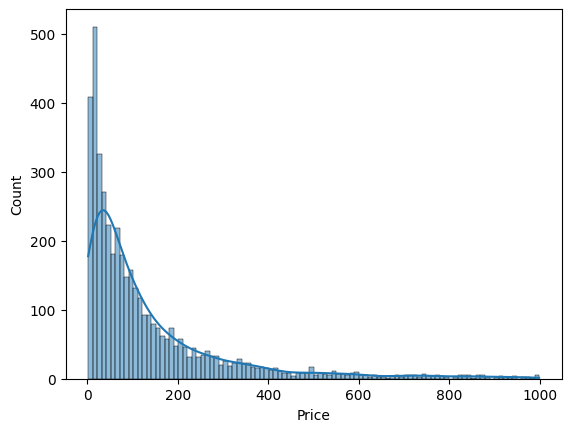

In [56]:
sns.histplot(data=raw_df[raw_df['Price']<1000], x="Price", bins=100, kde=True)

* More than 500 keywords offer products with avarage price between 10-20 $.

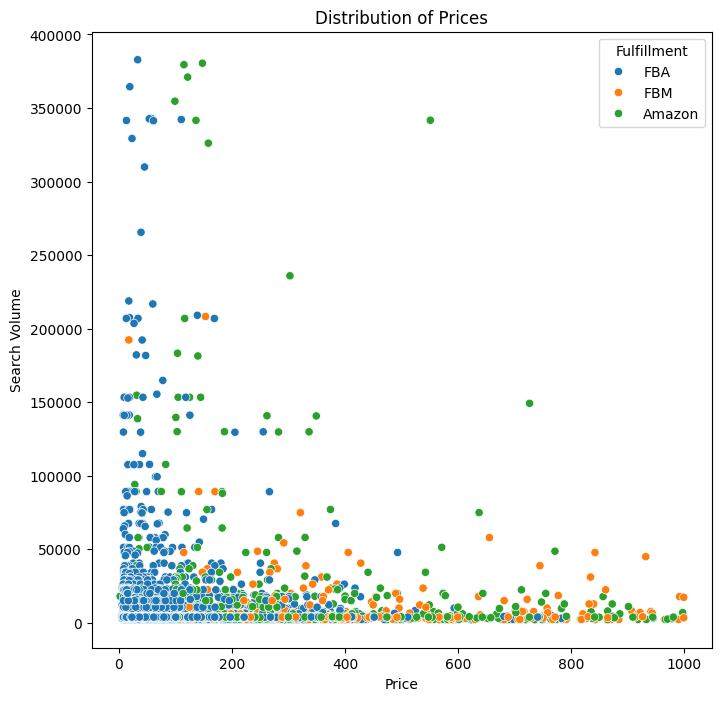

In [57]:
# I will remove from the outliers to visualize better.
otlr_removed = raw_df[(raw_df.Price < 1000) & (raw_df['Search Volume'] < 400000)]
plt.figure(figsize=(8,8))
plt.title("Distribution of Prices")
sns.scatterplot(data=otlr_removed, x="Price", y="Search Volume", hue="Fulfillment")
plt.show();

* Products with less than $ 100 are most likely sold as FBA.

* It is hard to compete with FBA sellers or Amazon on cheap product.

* Expensive products are intent to be sold as FBM.

* Increase in product price of product dimension may be more profitable for FBM fulfillment type.

### Best Seller Rank

BSR is the ranking of the best seller product. Best selling product has the BSR of 1.
* Increase in BSR means decrease in sales.
* Decrease in BSR means increase in sales.

Thus, keywords with lower BSR shows the popular products.

In [58]:
raw_df.BSR.describe()

count      4511.000000
mean      31948.951230
std       51576.640409
min           5.000000
25%        4984.500000
50%       13989.000000
75%       36250.500000
max      632973.000000
Name: BSR, dtype: float64

 BSR of the keywords are waving between 5 and 632k

<Axes: xlabel='BSR', ylabel='Count'>

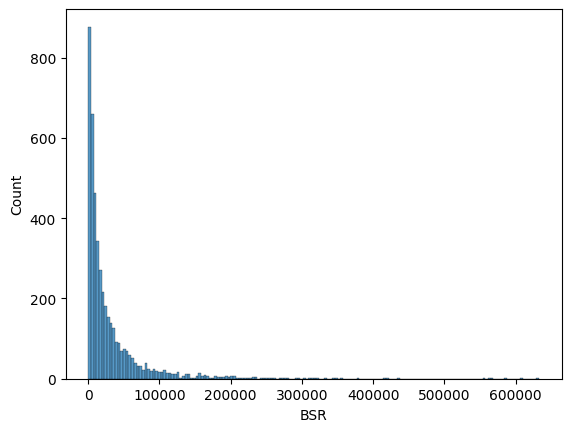

In [59]:
sns.histplot(data=raw_df.BSR)

In [60]:
# Keywords with lower BSR

low_bsr = raw_df.sort_values("BSR")
low_bsr.head(25)

,Phrase,Search Volume,Category,Fulfillment,Size Tier,Variation Count,BSR,Price,Monthly Sales,Monthly Revenue,...,Reviews Rating,Sellers,Last Year Sales,Sales Year Over Year,Sales Trend (90 days),Price Trend (90 days),Best Sales Period,Broad Reach Potential,Number of competing products,Sales to Reviews
1506,apple iphone 13 pro max,3116,Electronics,Amazon,Large Standard-Size,1,5,189.99,36162,6870418.38,...,4.70,4,NaN,NaN,1,-8,"Jan, 2024",6,100,3.45
1023,apple ipads,2205,Electronics,Amazon,Large Standard-Size,32,15,499.00,26454,13200546,...,4.80,5,NaN,NaN,0,-2,"Jan, 2024",10,356,2.66
1261,tablet apple ipad,2312,Electronics,Amazon,Large Standard-Size,32,15,349.00,26454,9232446,...,4.80,4,NaN,NaN,0,-5,"Jan, 2024",6,388,2.67
4244,ipad 5th generation,4129,Electronics,Amazon,Large Standard-Size,32,15,499.00,26454,13200546,...,4.80,5,NaN,NaN,0,-2,"Jan, 2024",8,5000,2.66
4295,ipad renewed,3974,Electronics,Amazon,Large Standard-Size,32,17,349.00,26454,9232446,...,4.80,4,NaN,NaN,0,-4,"Jan, 2024",5,465,2.67
1254,ipad 128gb,2312,Electronics,Amazon,Large Standard-Size,32,17,499.00,26454,13200546,...,4.80,5,NaN,NaN,0,-1,"Jan, 2024",7,579,2.66
354,ipad 10.9,2168,Electronics,Amazon,Large Standard-Size,32,17,349.00,26454,9232446,...,4.80,4,NaN,NaN,0,-4,"Jan, 2024",6,3000,2.67
2633,apple ipad 9th generation,10030,Electronics,Amazon,Large Standard-Size,32,17,349.00,26454,9232446,...,4.80,4,NaN,NaN,0,-4,"Jan, 2024",6,197,2.67
2034,ipad air,140656,Electronics,Amazon,Large Standard-Size,32,20,349.00,26454,9232446,...,4.80,4,NaN,NaN,0,-3,"Jan, 2024",10,312,2.67
2731,ipad air 4th generation,9739,Electronics,Amazon,Large Standard-Size,17,21,232.00,24304,5890078,...,4.75,4,NaN,NaN,0,-4,"Jan, 2024",6,2000,1.46


In [123]:
px.bar(data_frame=low_bsr.head(25), x="BSR", y="Phrase", title="Distribution of BSR", color="Fulfillment")

* Unsuprisingly Apple products has lowest BSRs like Search Volume.
* Amazon is dominating the best seller products as seller.
* FBA is one of the core factors of best selling keywords.
* Wireless connection devices for cars are in demand. Car maker should adapt wireless phone connection :)
* Most searched and best selling products are directly searched by product name and brand name. That shoes the power of branding and brand dominance.

In [62]:
# Most of the re-seller tries to sell products with BSR under 100k. Let's Check how many and which keywords has BSR under 100k

under100k = raw_df[raw_df.BSR<100000]
len(under100k)

4185

* More than %90 of the keywords has BSR under 100k

### Number of Competing Products

Amazon is the most popular online marketlace for both shoppers and sellers.
There is intense competition between sellers. Competition effects many factors.

* Competition causes decrease in profits. So sellers tries to find and index in low competition areas to make more profit and more importantly to be seen by shoppers.

* More competition may require more marketing budget.

In [63]:
# First check the keywords with less competing products.

less_comp = raw_df.sort_values("Number of competing products")
less_comp.head(25)

,Phrase,Search Volume,Category,Fulfillment,Size Tier,Variation Count,BSR,Price,Monthly Sales,Monthly Revenue,...,Reviews Rating,Sellers,Last Year Sales,Sales Year Over Year,Sales Trend (90 days),Price Trend (90 days),Best Sales Period,Broad Reach Potential,Number of competing products,Sales to Reviews
2903,casate con mi esposo,6503,Electronics,FBA,Large Standard-Size,4,70592,28.82,143,4231.43,...,4.63,2,NaN,NaN,0,0,"Jan, 2024",2,1,0.86
22,need for speed unbound palace edition bundle -...,2838,Electronics,FBM,NaN,11,56071,494.50,8,4844.97,...,4.10,3,166.0,-57.0,0,4,"Jan, 2024",0,3,0.01
2714,kpkue,9754,Electronics,FBA,Large Standard-Size,2,584583,294.99,196,28383.04,...,3.90,2,6379.0,NaN,-28,-18,"Jul, 2023",2,4,0.25
1538,thunderstorm sleep videoaawaa,3093,Electronics,FBA,Large Standard-Size,24,20363,245.97,71,17463.87,...,4.70,1,NaN,NaN,0,0,"Jan, 2024",0,9,0.28
4264,itunes,4127,Electronics,FBA,Large Standard-Size,7,456,26.99,6730,181642.7,...,4.80,1,NaN,NaN,0,-79,"Jan, 2024",8,10,9.78
1210,u8k,2312,Electronics,Amazon,Large Oversize,4,195389,1189.42,314,273770.79,...,4.27,9,251.0,-74.0,21,-3,"Nov, 2023",4,14,0.69
3977,dragy,3923,Electronics,FBA,Large Standard-Size,1,344860,290.21,113,16653.58,...,4.14,2,2567.0,NaN,0,0,"Dec, 2023",3,15,1.38
384,superboxx,2137,Electronics,FBM,Large Standard-Size,4,187361,492.45,86,21893.23,...,4.23,3,2.0,NaN,0,0,"Jan, 2024",0,15,8.54
1457,apple gift cards email delivery 10-500,3129,Electronics,Amazon,Small Standard-Size,3,3436,50.00,932,46600,...,4.50,1,NaN,NaN,-41,0,"Dec, 2023",0,16,0.57
2362,wiim pro plus,4923,Electronics,FBA,Large Standard-Size,2,68882,304.14,547,102358.52,...,4.37,5,7991.0,-40.0,-9,0,"Jan, 2024",2,22,0.61


* We are seeing long-tail keywords more often in less competition.

<Axes: xlabel='Number of competing products', ylabel='BSR'>

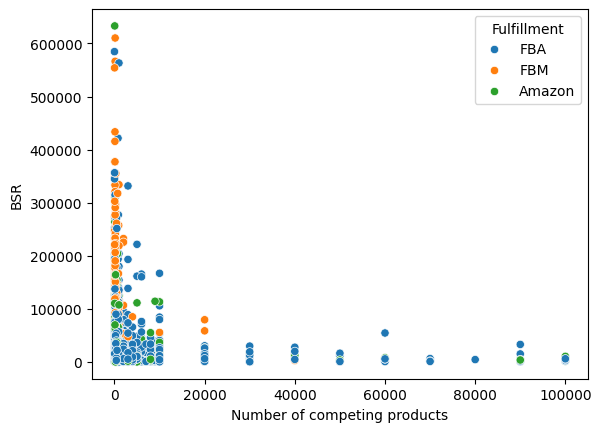

In [64]:
sns.scatterplot(raw_df, x="Number of competing products", y="BSR", hue="Fulfillment")

As we expected, lower BSR has more competition. There is no phrase that has more than 100k BSR with low competition.

<Axes: xlabel='Number of competing products', ylabel='Price'>

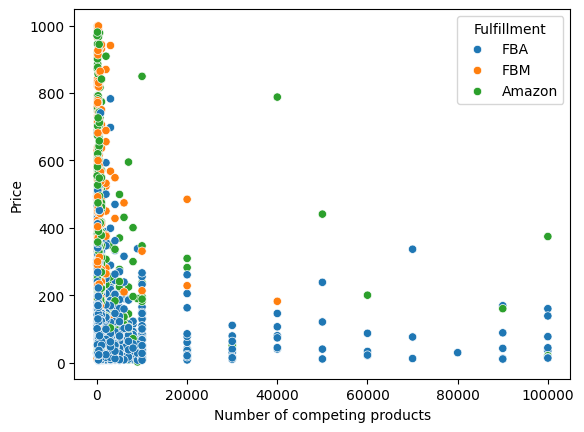

In [65]:
sns.scatterplot(otlr_removed, x="Number of competing products", y="Price", hue="Fulfillment")

### Size

Size of the products are important.
* Big sized products has more FBA fee, for FBA sellers.
* Big sized products has more shipping costs for FBM sellers.
* It may be a problem to stock big sized for problem for FBM sellers.

Let's evaluate the size of the products with Search Volume and Fulfillment Type


In [66]:
# How many size type there is?
raw_df['Size Tier'].unique()

array(['Large Standard-Size', 'Small Oversize', 'Small Standard-Size',
       nan, 'Medium Oversize', 'Large Oversize', 'Special Oversize'],
      dtype=object)

In [67]:
raw_df["Size Tier"].value_counts()

Large Standard-Size    3423
Small Oversize          552
Small Standard-Size     406
Large Oversize           61
Special Oversize         30
Medium Oversize          16
Name: Size Tier, dtype: int64

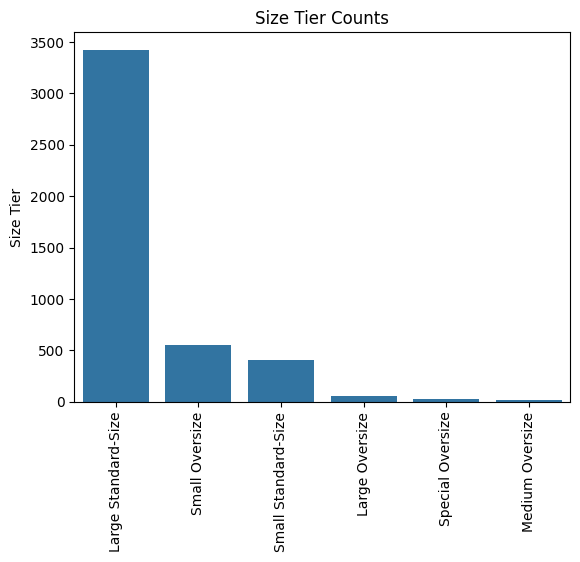

In [68]:
sns.barplot(data=raw_df["Size Tier"].value_counts())
plt.xticks(rotation=90)
plt.title("Size Tier Counts");

Check out the dimensions of each size:

[https://sellercentral.amazon.com/help/hub/reference/external/GG5KW835AHDJCH8W?ref=efph_GG5KW835AHDJCH8W_cont_GPDC3KPYAGDTVDJP&locale=en-US](https://)



<Axes: xlabel='Search Volume', ylabel='Phrase'>

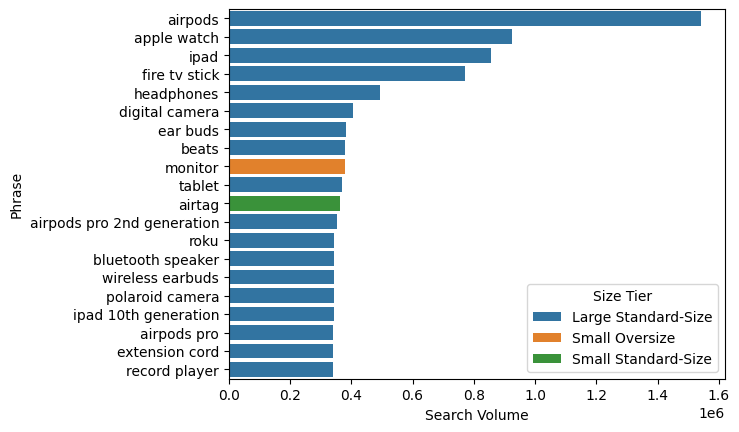

In [69]:
# Size Tier - Price
sns.barplot(data=top_to_bottom.head(20), x="Search Volume", y="Phrase", hue="Size Tier")

* Large Standard-size has dominance on Size Tiers. A seller should consider Size Tier while calculating shipping and FBA fees.

### Review Count

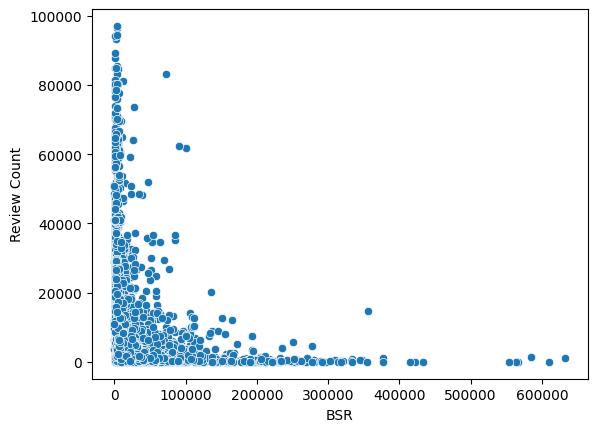

In [70]:
sns.scatterplot(data=raw_df[raw_df['Review Count']<100000], y="Review Count", x="BSR");

### Number of Sellers

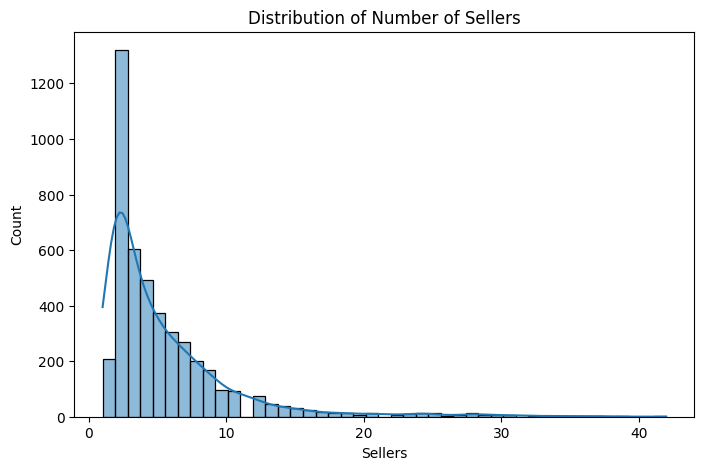

In [71]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Number of Sellers")
sns.histplot(data=raw_df, x="Sellers", kde=True, bins=45);

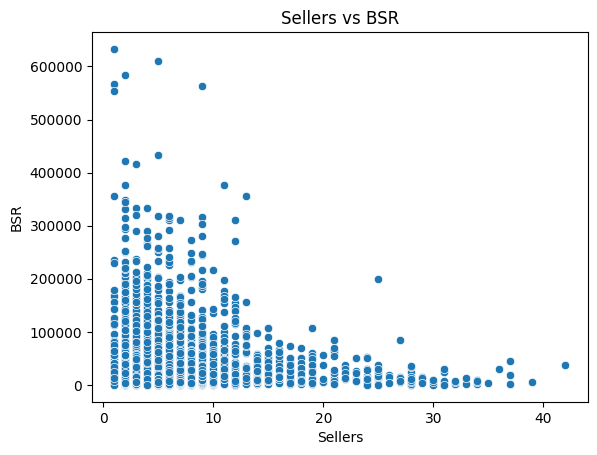

In [72]:
plt.title("Sellers vs BSR")
sns.scatterplot(data=raw_df, x="Sellers", y="BSR");

* Lower BSR, has more sellers.
* Number of seller is a factor for arbitrage sellers to consider while searching products. Single seller of a product may cause a IP claim.
* Private Label sellers pay attention to number of sellers in keywords to better understand the competition and brand dominance.

### Variation Count

In [77]:
px.histogram(data_frame=raw_df, x="Variation Count")

In [78]:
px.violin(data_frame=raw_df[raw_df["Price"]<2000], x="Price", y="Fulfillment")